# A quick introduction to plotting in Python

[Matplotlib](https://matplotlib.org/) (MPL) is the default choice, with other options including [Seaborn](https://seaborn.pydata.org) for high-level plotting, [Plotly](https://plot.ly/python/) for JS plotting framework, [Bokeh](https://bokeh.org/) for interactive plotting.


## Installation

Matplotlib is included in the [Anaconda](https://www.anaconda.com/products/individual) distribution.

Install it via `conda` in case you got a miniconda distribution that comes without

```bash
conda install matplotlib
```

If you're using `pip` instead of `conda`

```bash
pip install matplotlib
```

## Reference

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* [Scipy Lecture Notes](http://www.scipy-lectures.org/intro/matplotlib/index.html)
* [Numerical Python Course](https://www.python-course.eu/matplotlib.php)
* [Python Graph Gallery](https://python-graph-gallery.com/)
* [Matplotlib official guide](https://matplotlib.org/users/index.html)
* [Matplotlib Tutorial – A Complete Guide to Python Plot w/ Examples](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples)
* [Top 50 matplotlib visualizations ](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
* [Matplotlib Tutorial: Learn the basics of Python’s powerful Plotting library](https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596)

**Anatomy of a figure** (from mpl official website)

![](https://matplotlib.org/3.2.1/_images/sphx_glr_anatomy_001.png)

Conventional short names for `matplotlib` and `numpy`:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# For inline plotting in jupyter notebooks
%matplotlib inline  

## Line plots

Line plots are usually for visualization of 2D data.

e.g. time series (y-t), phase plots (x-y)

```py
plt.plot(xs, ys)
```

See also

* [Line styles](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)
* [Line color and dot styles](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)
* [figure()](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html?highlight=figure#matplotlib.pyplot.figure)

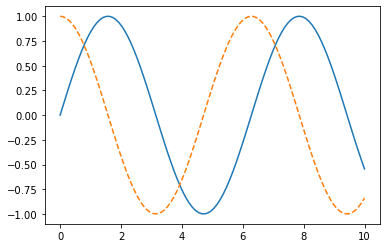

In [2]:
# Data #
x = np.linspace(0, 10, num=100)
y1 = np.sin(x)
y2 = np.cos(x)

# Opens a new figure to be plotted
plt.figure()

# plot(x, y, <MATLAB stylestring>)
plt.plot(x, y1, '-')  
plt.plot(x, y2, '--')

Add more things to the plot.

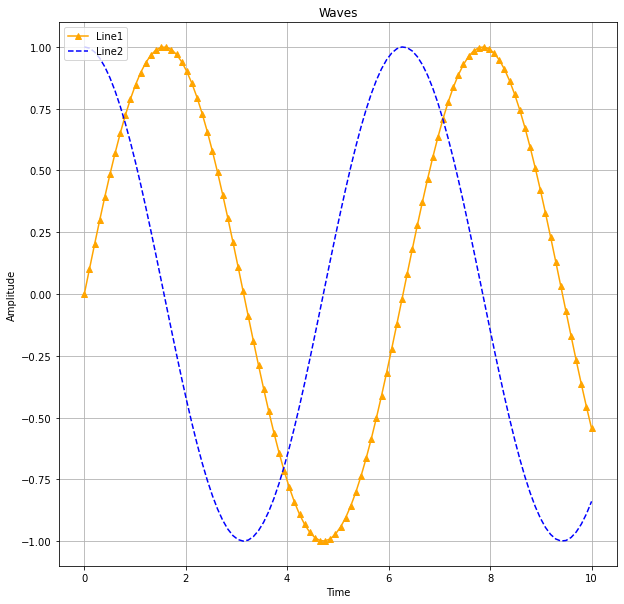

In [3]:
# Let's add some more options

# Set figure (whole picture) size to 10 * 10
plt.figure(figsize = (10, 10))

# Add grid
plt.grid() 

# Title
plt.title("Waves")

# Lables for X & Y axes
plt.xlabel("Time")
plt.ylabel("Amplitude")

# 'o-' does not mean orange line rather than circle dots
# '^' means triangle dots
# line labels are also set
plt.plot(x, y1, '^-', label="Line1", color='orange')  
plt.plot(x, y2, 'b--', label="Line2")

# Show the labels
plt.legend(loc='upper left')

### Line customization

- color:
https://xkcd.com/color/rgb/

- line/marker style:
https://www.labri.fr/perso/nrougier/teaching/matplotlib/#figures-subplots-axes-and-ticks

<div style="display:inline-block;">
    <a href="https://imgur.com/OaaO9GE" ><img src="https://i.imgur.com/OaaO9GE.png" title="source: imgur.com" align="left" width = 42%>
    </a>
    <a href="https://imgur.com/IhUOXv6"><img src="https://i.imgur.com/IhUOXv6.png" title="source: imgur.com" align="right" width = 50%>
    </a>
</div>


## Multiple series

**1 column = 1 series of data**

In [4]:
# Data #
x = np.linspace(0, 10, 100)

# 4 columns of data = 4 series
# y = sin(x + 0.5k * pi); k = 0, 1, 2, 3
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
y.shape

(100, 4)

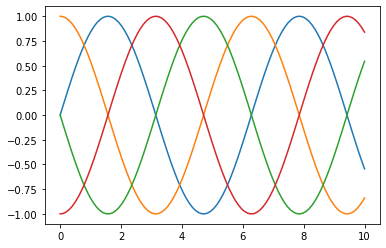

In [5]:
plt.figure()
plt.plot(x, y)

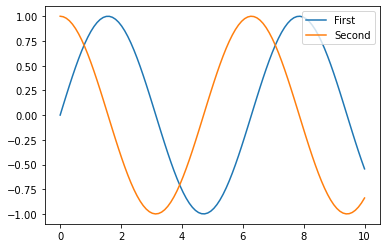

In [6]:
plt.figure()
lines = plt.plot(x, y[:, 0:2])

# Another way to set labels
plt.legend(lines, ['First', 'Second'], loc='upper right')

## Tweaking Axis ticks

* Logarithmic scale

```py
plt.xscale('log')
```

* Hiding ticks. [@stack overflow](https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot)

```py
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
```

See also: [axes()](https://matplotlib.org/3.1.1/api/axes_api.html)

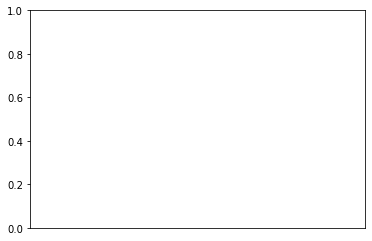

In [8]:
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

Text(0, 0.5, 'dB')

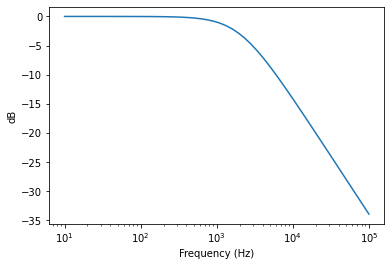

In [9]:
# Bode plot example

# Transfer function
def H(w):
    wc = 4000*np.pi
    return 1.0 / (1.0 + 1j * w / wc)

freq = np.logspace(1,5) # frequencies from 10**1 to 10**5 Hz

plt.figure()
plt.plot(freq, 20*np.log10(abs(H(2*np.pi*freq))))
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('dB')

## Multiple subplots

One could use MATLAB-style to define the subplots. 

But the object-oriented way is even better. See [`subplots()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html).

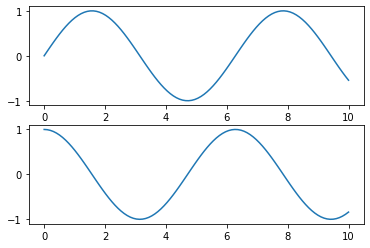

In [10]:
# MATLAB style
# subplot(rows, columns, panel number)
plt.subplot(2, 1, 1)
plt.plot(x, y1)
# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, y2)

Text(0.5, 0.98, 'Common title')

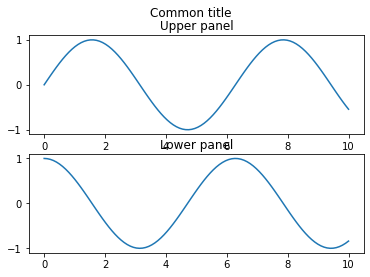

In [11]:
# OO style (recommended)
fig, ax = plt.subplots(2)
# Plot for each axes (an unit in the figure)
ax[0].plot(x, y1)
ax[0].set_title("Upper panel")
ax[1].plot(x, y2)
ax[1].set_title("Lower panel")
# Common title
plt.suptitle("Common title")

## Scatter plots

```py
plt.plot(x, y, 'o')
```

Ref: [Python Data Science Handbook ](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)

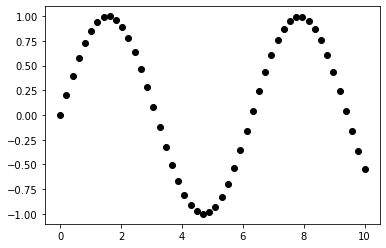

In [12]:
# Using plot() function
plt.figure()
x = np.linspace(0, 10)
y1 = np.sin(x)
plt.plot(x, y1, 'o', color='black')
# Same as plt.scatter(x, y1, marker='o', color='black')

## Color map (cmap) and colorbar()
```py
plt.scatter(x, y, c=colors)
plt.colorbar()
```

See also [colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) and [colorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html)

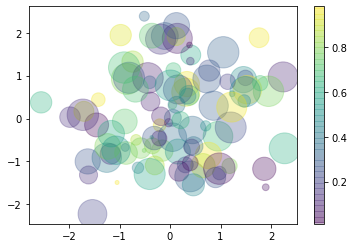

In [13]:
# Data #
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

# Plot #
plt.figure()

# cmap for color mapping
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')

# show color scale bar
plt.colorbar()

## Error bar
```py
plt.errorbar(x, y, yerr=dy, fmt='.k')
```

See also: [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)

<ErrorbarContainer object of 3 artists>

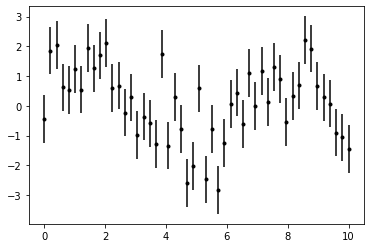

In [14]:
# Data #
x = np.linspace(0, 10, 50)  # Input
dy = 0.8                                  # Uncertainty level
y = np.sin(x) + dy * np.random.randn(50)  # Output with uncertainty

# Plot #
plt.figure()
# xerr or yerr parameter to set error bars
plt.errorbar(x, y, yerr=dy, fmt='.k')

## Contour plots

```py
plt.contour(X, Y, Z)
```

See also [`contour()`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.contour.html) and [`imshow()`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=imshow#matplotlib.pyplot.imshow)

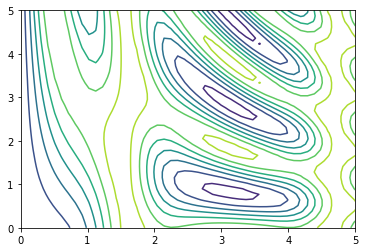

In [15]:
# data #
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# plot #
plt.figure()
plt.contour(X, Y, Z)

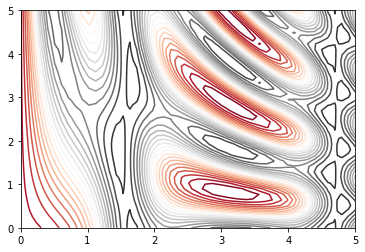

In [16]:
plt.figure()
# Change color map
plt.contour(X, Y, Z, 20, cmap='RdGy')

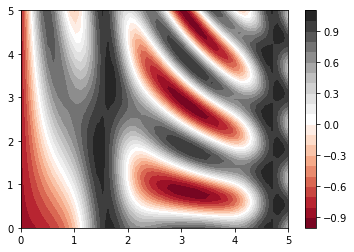

In [17]:
plt.figure()

# contourf() for filled countor plot
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

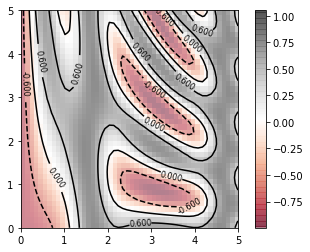

In [18]:
plt.figure()
contours = plt.contour(X, Y, Z, 3, colors='black')

# Add labels of levels in the contour plot
plt.clabel(contours, inline=True, fontsize=8)

# Render image on the plot (faster but lower quality)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)

plt.colorbar()

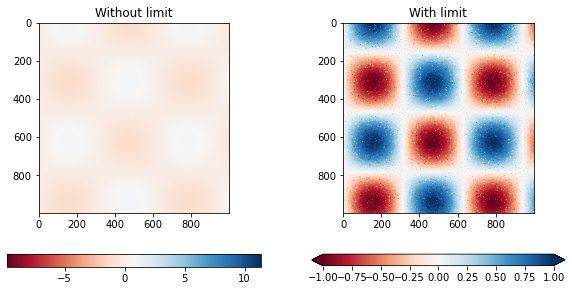

In [19]:
#### set_clim() to set limits on the values in the color bar

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Data #
x = np.linspace(0, 10, 1000)	            # 1000 * 1
I = np.sin(x) * np.cos(x[:, np.newaxis])  # 1000 * 1000
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

# Figure #
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
# Left subplot
axs[0].set_title('Without limit')
im0 = axs[0].imshow(I, cmap='RdBu')
cb0 = plt.colorbar(im0, ax=axs[0], orientation='horizontal')
# Right subplot
axs[1].set_title('With limit')
im1 = axs[1].imshow(I, cmap='RdBu')
im1.set_clim(-1, 1)
cb1 = plt.colorbar(im1, ax=axs[1], extend='both', orientation='horizontal')

## Plotting vector fields (quiver / streamplot plot)

Source: <https://scipython.com/blog/visualizing-the-earths-magnetic-field/>

More on: [quiver()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.quiver.html?highlight=quiver#matplotlib.axes.Axes.quiver), [streamplot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.streamplot.html?highlight=streamplot#matplotlib.axes.Axes.streamplot)

Another example: <https://stackoverflow.com/questions/25342072/computing-and-drawing-vector-fields>

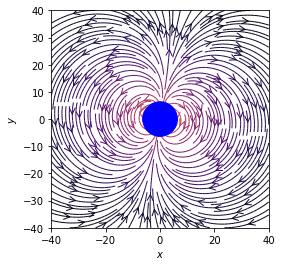

In [20]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Mean magnitude of the Earth's magnetic field at the equator in T
B0 = 3.12e-5
# Radius of Earth, Mm (10^6 m: mega-metres!)
RE = 6.370
# Deviation of magnetic pole from axis
alpha = np.radians(9.6)

def B(r, theta):
    """Return the magnetic field vector at (r, theta)."""
    fac = B0 * (RE / r)**3
    return -2 * fac * np.cos(theta + alpha), -fac * np.sin(theta + alpha)

# Grid of x, y points on a Cartesian grid
nx, ny = 64, 64
XMAX, YMAX = 40, 40
x = np.linspace(-XMAX, XMAX, nx)
y = np.linspace(-YMAX, YMAX, ny)
X, Y = np.meshgrid(x, y)
r, theta = np.hypot(X, Y), np.arctan2(Y, X)

# Magnetic field vector, B = (Ex, Ey), as separate components
Br, Btheta = B(r, theta)

# Transform to Cartesian coordinates: NB make North point up, not to the right.
c, s = np.cos(np.pi/2 + theta), np.sin(np.pi/2 + theta)
Bx = -Btheta * s + Br * c
By = Btheta * c + Br * s

fig, ax = plt.subplots()

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Bx, By))
ax.streamplot(x, y, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add a filled circle for the Earth; make sure it's on top of the streamlines.
ax.add_patch(Circle((0,0), RE, color='b', zorder=100))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-XMAX, XMAX)
ax.set_ylim(-YMAX, YMAX)
ax.set_aspect('equal')

[None, Text(0.5, 1.0, 'Quiver Plot')]

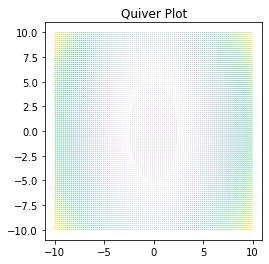

In [21]:
# Another vector field example
import numpy as np
import matplotlib.pyplot as plt

# Set limits and number of points in grid
y, x = np.mgrid[10:-10:100j, 10:-10:100j]

x_obstacle, y_obstacle = 0.0, 0.0
alpha_obstacle, a_obstacle, b_obstacle = 1.0, 1e3, 2e3

p = -alpha_obstacle * np.exp(-((x - x_obstacle)**2 / a_obstacle + (y - y_obstacle)**2 / b_obstacle))
# For the absolute values of "dx" and "dy" to mean anything, we'll need to
# specify the "cellsize" of our grid.  For purely visual purposes, though,
# we could get away with just "dy, dx = np.gradient(p)".
dy, dx = np.gradient(p)
fig, ax = plt.subplots()
ax.quiver(x, y, dx, dy, p)
ax.set(aspect=1, title='Quiver Plot')

[None, Text(0.5, 1.0, 'Quiver Plot (3rd points)')]

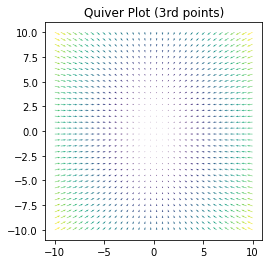

In [22]:
# Quiver plot with less density (draw every 3rd point)
skip = (slice(None, None, 3), slice(None, None, 3))
fig, ax = plt.subplots()
ax.quiver(x[skip], y[skip], dx[skip], dy[skip], p[skip])
ax.set(aspect=1, title='Quiver Plot (3rd points)')

[None, Text(0.5, 1.0, 'Streamplot with contours')]

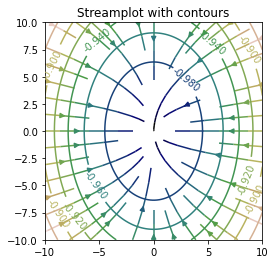

In [23]:
# Streamplot with contour plot
fig, ax = plt.subplots()
ax.streamplot(x, y, dx, dy, color=p, density=0.5, cmap='gist_earth')
cont = ax.contour(x, y, p, cmap='gist_earth')
ax.clabel(cont)
ax.set(aspect=1, title='Streamplot with contours')

[None, Text(0.5, 1.0, 'Streamplot with contours and strokes')]

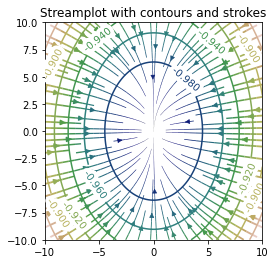

In [24]:
# Streamplot with stroke + contour plot

from matplotlib.patheffects import withStroke
fig, ax = plt.subplots()
ax.streamplot(x, y, dx, dy, linewidth=500*np.hypot(dx, dy),color=p, density=1.2, cmap='gist_earth')
cont = ax.contour(x, y, p, cmap='gist_earth', vmin=p.min(), vmax=p.max())
labels = ax.clabel(cont)
plt.setp(labels, path_effects=[withStroke(linewidth=8, foreground='w')])
ax.set(aspect=1, title='Streamplot with contours and strokes')

### anotations

anotations: https://matplotlib.org/tutorials/text/annotations.html#plotting-guide-annotation

Text(0.5,0.5,'fixed arrow')

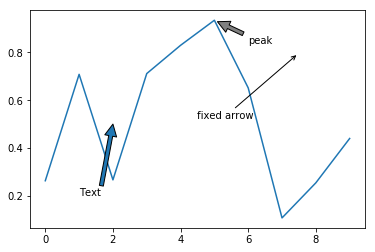

In [319]:
data = np.random.rand(10)
plt.plot(data)
plt.annotate("Text",(2,0.5),(1,0.2),arrowprops= dict())

plt.annotate("peak",
             (np.where(data==data.max())[0][0],data.max()), # where to point
             xycoords='data', 
             xytext=(np.where(data==data.max())[0][0]+1,data.max()-0.1), # where to put text
             arrowprops = dict(facecolor="grey",shrink=0.09)) # arrow property

plt.annotate("fixed arrow",
             (0.8,0.8),xycoords='axes fraction',
             xytext=(0.5,0.5),textcoords='axes fraction',
             arrowprops = dict(arrowstyle="->")
            )

# plt.show()